<a href="https://colab.research.google.com/github/scraamjet/Data-Analisys-project-1/blob/master/Data_Analysis_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Над проектом работают: Шабунин Артем, Галиев Наиль, Романов Олег, Галяутдинов Ризат


# Тема:
*   Прогнозирование платежеспособности потенциального клиента по динамике и качеству платежей клиента по другим кредитам.


# Этап 1:

1.   Импортирование нужных библиотек, получение общей информации о датасете credits.
2.   Предобработка данных обоих датафрейма.
3.   Мультколлинеарность. Работа с целевой переменной.


# 1.   Импортирование нужных библиотек, получение общей информации о датафрейме credits :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Загрузка датасетов
from google.colab import files
uploaded = files.upload()

Saving credits.xlsx to credits (1).xlsx


In [ ]:
import io
credits_data = io.BytesIO(uploaded['credits.xlsx'])

In [ ]:
credits_df = pd.read_excel(credits_data, sheet_name = 'исходник',header = 1)  

In [ ]:
credits_df

,NaturalPersonID,RequestDate,Количество участников в заявке,Количество фактов без просроченной задолженности за последние 3 мес (не текущая),Количество фактов без просроченной задолженности за последние 6 мес (не текущая),Количество фактов без просроченной задолженности за последние 9 мес (не текущая),Количество фактов без просроченной задолженности за последние 12 мес (не текущая),Количество фактов без просроченной задолженности за последние 18 мес (не текущая),Количество фактов без просроченной задолженности за последние 24 мес (не текущая),Количество фактов без просроченной задолженности за последние 36 мес (не текущая),Количество фактов без просроченной задолженности за последние 48 мес (не текущая),Количество фактов без просроченной задолженности за последние 60 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 3 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 6 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 9 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 12 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 18 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 24 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 36 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 48 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 60 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 3 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 6 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 9 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 12 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 18 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 24 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 36 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 48 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 60 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 3 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 6 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 9 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 12 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 18 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 24 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 36 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 48 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 60 мес (не текущая),Количество фактов просроченной задолженности 60-89 дней за последние 3 мес (не текущая),...,Количество фактов просроченной задолженности 30-59 дней (до 2 лет) и просроченная задолжность 1-1000,Количество фактов просроченной задолженности 30-59 дней (до 2 лет) и просроченная задолжность 1001-3000,Количество фактов просроченной задолженности 30-59 дней (до 2 лет) и просроченная задолжность 3001 и более,Количество фактов просроченной задолженности 60-89 дней (до 2 лет) и просроченная задолжность 1-1000,Количество фактов просроченной задолженности 60-89 дней (до 2 лет) и просроченная задолжность 1001-3000,Количество фактов просроченной задолженности 60-89 дней (до 2 лет) и просроченная задолжность 3001 и более,Количество фактов просроченной задолженности от 90 дней и более (до 2 лет) и просроченная задолжность 1-1000,Количество фа

# 2. Предобработка данных датасета credits:

In [ ]:
#Посчитаем кол-во дубликатов
credits_df.duplicated().sum()

0

In [ ]:
#Посчитаем кол-во пропусков по столбцам
credits_df.isnull().sum().head(60)

NaturalPersonID                                                                                 0
RequestDate                                                                                     0
Количество участников в заявке                                                                  0
Количество фактов без просроченной задолженности за последние 3 мес (не текущая)             1443
Количество фактов без просроченной задолженности за последние 6 мес (не текущая)             1443
Количество фактов без просроченной задолженности за последние 9 мес (не текущая)             1443
Количество фактов без просроченной задолженности за последние 12 мес (не текущая)            1443
Количество фактов без просроченной задолженности за последние 18 мес (не текущая)            1443
Количество фактов без просроченной задолженности за последние 24 мес (не текущая)            1443
Количество фактов без просроченной задолженности за последние 36 мес (не текущая)            1443
Количество фактов бе

In [ ]:
#Основная информация 
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16385 entries, 0 to 16384
Columns: 218 entries, NaturalPersonID to Target
dtypes: datetime64[ns](1), float64(202), int64(2), object(13)
memory usage: 27.3+ MB


In [ ]:
#Заменяем пустые значения признаков нулями
credits_df.replace("",np.nan, inplace=True)
credits_df

,NaturalPersonID,RequestDate,Количество участников в заявке,Количество фактов без просроченной задолженности за последние 3 мес (не текущая),Количество фактов без просроченной задолженности за последние 6 мес (не текущая),Количество фактов без просроченной задолженности за последние 9 мес (не текущая),Количество фактов без просроченной задолженности за последние 12 мес (не текущая),Количество фактов без просроченной задолженности за последние 18 мес (не текущая),Количество фактов без просроченной задолженности за последние 24 мес (не текущая),Количество фактов без просроченной задолженности за последние 36 мес (не текущая),Количество фактов без просроченной задолженности за последние 48 мес (не текущая),Количество фактов без просроченной задолженности за последние 60 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 3 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 6 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 9 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 12 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 18 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 24 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 36 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 48 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 60 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 3 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 6 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 9 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 12 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 18 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 24 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 36 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 48 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 60 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 3 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 6 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 9 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 12 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 18 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 24 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 36 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 48 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 60 мес (не текущая),Количество фактов просроченной задолженности 60-89 дней за последние 3 мес (не текущая),...,Количество фактов просроченной задолженности 30-59 дней (до 2 лет) и просроченная задолжность 1-1000,Количество фактов просроченной задолженности 30-59 дней (до 2 лет) и просроченная задолжность 1001-3000,Количество фактов просроченной задолженности 30-59 дней (до 2 лет) и просроченная задолжность 3001 и более,Количество фактов просроченной задолженности 60-89 дней (до 2 лет) и просроченная задолжность 1-1000,Количество фактов просроченной задолженности 60-89 дней (до 2 лет) и просроченная задолжность 1001-3000,Количество фактов просроченной задолженности 60-89 дней (до 2 лет) и просроченная задолжность 3001 и более,Количество фактов просроченной задолженности от 90 дней и более (до 2 лет) и просроченная задолжность 1-1000,Количество фа

In [ ]:
credits_df.index = range(len(credits_df))

In [ ]:
#Сохранение целевой переменной
target = credits_df.Target
target

0        0
1        0
2        0
3        0
4        0
        ..
16380    0
16381    0
16382    0
16383    0
16384    0
Name: Target, Length: 16385, dtype: int64

In [ ]:
#Проверяем количество нулевых значений в столбцах датасета
credits_df.isnull().sum(axis=1) 

0         13
1         11
2         17
3         11
4         11
        ... 
16380     20
16381     11
16382     20
16383    198
16384     11
Length: 16385, dtype: int64

In [ ]:
credits_df


,NaturalPersonID,RequestDate,Количество участников в заявке,Количество фактов без просроченной задолженности за последние 3 мес (не текущая),Количество фактов без просроченной задолженности за последние 6 мес (не текущая),Количество фактов без просроченной задолженности за последние 9 мес (не текущая),Количество фактов без просроченной задолженности за последние 12 мес (не текущая),Количество фактов без просроченной задолженности за последние 18 мес (не текущая),Количество фактов без просроченной задолженности за последние 24 мес (не текущая),Количество фактов без просроченной задолженности за последние 36 мес (не текущая),Количество фактов без просроченной задолженности за последние 48 мес (не текущая),Количество фактов без просроченной задолженности за последние 60 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 3 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 6 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 9 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 12 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 18 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 24 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 36 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 48 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 60 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 3 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 6 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 9 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 12 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 18 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 24 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 36 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 48 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 60 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 3 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 6 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 9 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 12 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 18 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 24 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 36 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 48 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 60 мес (не текущая),Количество фактов просроченной задолженности 60-89 дней за последние 3 мес (не текущая),...,Количество фактов просроченной задолженности 30-59 дней (до 2 лет) и просроченная задолжность 1-1000,Количество фактов просроченной задолженности 30-59 дней (до 2 лет) и просроченная задолжность 1001-3000,Количество фактов просроченной задолженности 30-59 дней (до 2 лет) и просроченная задолжность 3001 и более,Количество фактов просроченной задолженности 60-89 дней (до 2 лет) и просроченная задолжность 1-1000,Количество фактов просроченной задолженности 60-89 дней (до 2 лет) и просроченная задолжность 1001-3000,Количество фактов просроченной задолженности 60-89 дней (до 2 лет) и просроченная задолжность 3001 и более,Количество фактов просроченной задолженности от 90 дней и более (до 2 лет) и просроченная задолжность 1-1000,Количество фа

In [ ]:
credits_df.fillna(0,inplace = True)

In [ ]:
#Преобразовал столбец в float
credits_df.loc[:,'Количество участников в заявке':'Target'] = credits_df.apply( pd.to_numeric, errors='coerce' )

In [ ]:
#Перевел столбец в datetime
pd.to_datetime(credits_df['RequestDate'], format='%Y%m%d', errors='coerce')


0       2015-04-01
1       2015-04-01
2       2015-04-01
3       2015-04-01
4       2015-04-01
           ...    
16380   2017-03-31
16381   2017-03-31
16382   2017-03-31
16383   2017-03-31
16384   2017-03-31
Name: RequestDate, Length: 16385, dtype: datetime64[ns]

In [ ]:
#Преобразовал id к соответствующему типу
credits_df['NaturalPersonID'].astype('|S')

0        b'C3517C47-78C6-4ED8-9345-D3FC8DA6B855'
1        b'05565D29-47AF-44BF-9BC9-AD2E65868638'
2        b'5CF1C36B-3257-461F-9F26-0088BD4F8BE2'
3        b'A1F96F38-C0B1-4C9E-BF5B-F031657A9A46'
4        b'5329E1E0-8DDC-4CD7-8182-E99D62390EDB'
                          ...                   
16380    b'BFE4F0BB-19A4-4546-B97A-53F40F0F3033'
16381    b'CAF5B4DF-004D-429D-A503-6BE5B665F558'
16382    b'13D93CDE-E249-422C-BB7B-2C25F2B1C94F'
16383    b'3FA5F5C0-6A60-4CBD-8C20-F7A0C450D6F5'
16384    b'99A34D28-4619-4064-8B68-DA43EE460098'
Name: NaturalPersonID, Length: 16385, dtype: bytes288

In [ ]:
credits_df.dtypes

NaturalPersonID                                                                             object
RequestDate                                                                         datetime64[ns]
Количество участников в заявке                                                               int64
Количество фактов без просроченной задолженности за последние 3 мес (не текущая)           float64
Количество фактов без просроченной задолженности за последние 6 мес (не текущая)           float64
                                                                                         ...      
Количество платежей (факты "0-9","В") за последние 24 месяца                               float64
Количество платежей (факты "0-9","В") за последние 36 месяца                               float64
Количество платежей (факты "0-9","В") за последние 48 месяца                               float64
Количество платежей (факты "0-9","В") за последние 60 месяца                               float64
Target    

# 3. Мультиколлинеарность. Работа с целевой переменной.



In [ ]:
credits_df.head(100)

,NaturalPersonID,RequestDate,Количество участников в заявке,Количество фактов без просроченной задолженности за последние 3 мес (не текущая),Количество фактов без просроченной задолженности за последние 6 мес (не текущая),Количество фактов без просроченной задолженности за последние 9 мес (не текущая),Количество фактов без просроченной задолженности за последние 12 мес (не текущая),Количество фактов без просроченной задолженности за последние 18 мес (не текущая),Количество фактов без просроченной задолженности за последние 24 мес (не текущая),Количество фактов без просроченной задолженности за последние 36 мес (не текущая),Количество фактов без просроченной задолженности за последние 48 мес (не текущая),Количество фактов без просроченной задолженности за последние 60 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 3 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 6 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 9 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 12 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 18 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 24 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 36 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 48 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 60 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 3 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 6 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 9 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 12 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 18 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 24 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 36 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 48 мес (не текущая),Количество фактов просроченной задолженности 6-29 дней за последние 60 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 3 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 6 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 9 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 12 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 18 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 24 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 36 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 48 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 60 мес (не текущая),Количество фактов просроченной задолженности 60-89 дней за последние 3 мес (не текущая),...,Количество фактов просроченной задолженности 30-59 дней (до 2 лет) и просроченная задолжность 1-1000,Количество фактов просроченной задолженности 30-59 дней (до 2 лет) и просроченная задолжность 1001-3000,Количество фактов просроченной задолженности 30-59 дней (до 2 лет) и просроченная задолжность 3001 и более,Количество фактов просроченной задолженности 60-89 дней (до 2 лет) и просроченная задолжность 1-1000,Количество фактов просроченной задолженности 60-89 дней (до 2 лет) и просроченная задолжность 1001-3000,Количество фактов просроченной задолженности 60-89 дней (до 2 лет) и просроченная задолжность 3001 и более,Количество фактов просроченной задолженности от 90 дней и более (до 2 лет) и просроченная задолжность 1-1000,Количество фа

In [ ]:
credits_feature_columns = [
'Количество фактов без просроченной задолженности за последние 6 мес (не текущая)',
'Количество фактов без просроченной задолженности за последние 12 мес (не текущая)',
'Количество фактов без просроченной задолженности за последние 36 мес (не текущая)',
'Количество фактов без просроченной задолженности за последние 60 мес (не текущая)',
'Количество фактов просроченной задолженности 1-5 дней за последние 6 мес (не текущая)',
'Количество фактов просроченной задолженности 1-5 дней за последние 12 мес (не текущая)',
'Количество фактов просроченной задолженности 1-5 дней за последние 36 мес (не текущая)',
'Количество фактов просроченной задолженности 1-5 дней за последние 60 мес (не текущая)',
'Количество фактов просроченной задолженности 30-59 дней за последние 6 мес (не текущая)',
'Количество фактов просроченной задолженности 30-59 дней за последние 12 мес (не текущая)',
'Количество фактов просроченной задолженности 30-59 дней за последние 36 мес (не текущая)',
'Количество фактов просроченной задолженности 30-59 дней за последние 60 мес (не текущая)',
'Количество фактов просроченной задолженности 30-59 дней (до 2 лет) и просроченная задолжность 1-1000',
'Количество фактов просроченной задолженности 60-89 дней (до 2 лет) и просроченная задолжность 1-1000',
'Количество фактов просроченной задолженности от 90 дней и более (до 2 лет) и просроченная задолжность 1-1000',
'Количество фактов просроченной задолженности 1-29 дней (от 2 до 4 лет) и просроченная задолжность 1-1000',
'Количество фактов просроченной задолженности от 90 дней и более (от 2 до 4 лет) и просроченная задолжность 1-1000',
'Количество кредитов (факты "0-9","В") за последние 6 месяца',
'Количество кредитов (факты "0-9","В") за последние 12 месяца',
'Количество кредитов (факты "0-9","В") за последние 36 месяца',
'Количество кредитов (факты "0-9","В") за последние 60 месяца',
'Количество платежей (факты "0-9","В") за последние 6 месяца',
'Количество платежей (факты "0-9","В") за последние 12 месяца',
'Количество платежей (факты "0-9","В") за последние 36 месяца',
'Количество платежей (факты "0-9","В") за последние 60 месяца',
'Target'

]
credits_feature_columns


['Количество фактов без просроченной задолженности за последние 6 мес (не текущая)',
 'Количество фактов без просроченной задолженности за последние 12 мес (не текущая)',
 'Количество фактов без просроченной задолженности за последние 36 мес (не текущая)',
 'Количество фактов без просроченной задолженности за последние 60 мес (не текущая)',
 'Количество фактов просроченной задолженности 1-5 дней за последние 6 мес (не текущая)',
 'Количество фактов просроченной задолженности 1-5 дней за последние 12 мес (не текущая)',
 'Количество фактов просроченной задолженности 1-5 дней за последние 36 мес (не текущая)',
 'Количество фактов просроченной задолженности 1-5 дней за последние 60 мес (не текущая)',
 'Количество фактов просроченной задолженности 30-59 дней за последние 6 мес (не текущая)',
 'Количество фактов просроченной задолженности 30-59 дней за последние 12 мес (не текущая)',
 'Количество фактов просроченной задолженности 30-59 дней за последние 36 мес (не текущая)',
 'Количество фак

In [ ]:
#Создание нового датафрейма для numeric_feature_columns:
credits_feature_df = credits_df[credits_feature_columns]
#Корелляция пирсона между колонками таблицы:
credits_corr_df = credits_feature_df.corr(method = 'pearson')
credits_corr_df

,Количество фактов без просроченной задолженности за последние 6 мес (не текущая),Количество фактов без просроченной задолженности за последние 12 мес (не текущая),Количество фактов без просроченной задолженности за последние 36 мес (не текущая),Количество фактов без просроченной задолженности за последние 60 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 6 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 12 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 36 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 60 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 6 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 12 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 36 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 60 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней (до 2 лет) и просроченная задолжность 1-1000,Количество фактов просроченной задолженности 60-89 дней (до 2 лет) и просроченная задолжность 1-1000,Количество фактов просроченной задолженности от 90 дней и более (до 2 лет) и просроченная задолжность 1-1000,Количество фактов просроченной задолженности 1-29 дней (от 2 до 4 лет) и просроченная задолжность 1-1000,Количество фактов просроченной задолженности от 90 дней и более (от 2 до 4 лет) и просроченная задолжность 1-1000,"Количество кредитов (факты ""0-9"",""В"") за последние 6 месяца","Количество кредитов (факты ""0-9"",""В"") за последние 12 месяца","Количество кредитов (факты ""0-9"",""В"") за последние 36 месяца","Количество кредитов (факты ""0-9"",""В"") за последние 60 месяца","Количество платежей (факты ""0-9"",""В"") за последние 6 месяца","Количество платежей (факты ""0-9"",""В"") за последние 12 месяца","Количество платежей (факты ""0-9"",""В"") за последние 36 месяца","Количество платежей (факты ""0-9"",""В"") за последние 60 месяца",Target
Количество фактов без просроченной задолженности за последние 6 мес (не текущая),1.000000,0.959482,0.814957,0.730923,0.195236,0.225505,0.260080,0.264477,0.030068,0.053305,0.080475,0.100322,0.008527,0.004137,0.011151,0.039054,0.008867,0.936017,0.858802,0.746086,0.687357,0.987753,0.948034,0.806647,0.720202,0.027816
Количество фактов без просроченной задолженности за последние 12 мес (не текущая),0.959482,1.000000,0.888570,0.801304,0.224929,0.250576,0.286950,0.290365,0.047788,0.065062,0.085014,0.103152,0.011305,0.004837,0.010092,0.041214,0.011128,0.913782,0.888483,0.778725,0.723522,0.954694,0.990724,0.879981,0.789582,0.022416
Количество фактов без просроченной задолженности за последние 36 мес (не текущая),0.814957,0.888570,1.000000,0.952371,0.235388,0.275036,0.349487,0.364155,0.059987,0.090760,0.122969,0.141466,0.019183,0.008639,0.009984,0.045862,0.014535,0.781876,0.801880,0.825365,0.793721,0.818530,0.888916,0.994299,0.942171,0.002051
Количество фактов без просроченной задолженности за последние 60 мес (не текущая),0.730923,0.801304,0.952371,1.000000,0.221310,0.259866,0.345833,0.387082,0.058715,0.085422,0.131997,0.163994,0.018220,0.005602,0.012227,0.050062,0.021668,0.701433,0.720120,0.788237,0.822101,0.735600,0.803398,0.949233,0.993500,-0.013434
Количество фактов просроченной задолженности 1-5 дней за последние 6 мес (не текущая),0.195236,0.224929,0.235388,0.221310,1.000000,0.883821,0.693133,0.610819,0.189051,0.213446,0.161474,0.156409,0.070768,0.026796,0.005553,0.061729,0.002673,0.296652,0.278055,0.240943,0.223877,0.325812,0.320911,0.285435,0.257780,0.067410
Количество фактов просроченной задолженности 1-5 дней за последние 12 мес (не текущая),0.225505,0.250576,0.275036,0.259866,0.883821,1.000000,0.827911,0.734897,0.223423,0.288022,0.235294,0.221552,0.072724,0.024400,0.004084,0.066631,-0.001594,0.318544,0.315707,0.272373,0.254358,0.344158,0.362481,0.337667,0.306774,0.

In [ ]:
#Убираю высококорелированные значения по модулю > 0,7
normal_corr = credits_corr_df.abs()
normal_corr = normal_corr[normal_corr < 0.7]
normal_corr

,Количество фактов без просроченной задолженности за последние 6 мес (не текущая),Количество фактов без просроченной задолженности за последние 12 мес (не текущая),Количество фактов без просроченной задолженности за последние 36 мес (не текущая),Количество фактов без просроченной задолженности за последние 60 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 6 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 12 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 36 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 60 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 6 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 12 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 36 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 60 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней (до 2 лет) и просроченная задолжность 1-1000,Количество фактов просроченной задолженности 60-89 дней (до 2 лет) и просроченная задолжность 1-1000,Количество фактов просроченной задолженности от 90 дней и более (до 2 лет) и просроченная задолжность 1-1000,Количество фактов просроченной задолженности 1-29 дней (от 2 до 4 лет) и просроченная задолжность 1-1000,Количество фактов просроченной задолженности от 90 дней и более (от 2 до 4 лет) и просроченная задолжность 1-1000,"Количество кредитов (факты ""0-9"",""В"") за последние 6 месяца","Количество кредитов (факты ""0-9"",""В"") за последние 12 месяца","Количество кредитов (факты ""0-9"",""В"") за последние 36 месяца","Количество кредитов (факты ""0-9"",""В"") за последние 60 месяца","Количество платежей (факты ""0-9"",""В"") за последние 6 месяца","Количество платежей (факты ""0-9"",""В"") за последние 12 месяца","Количество платежей (факты ""0-9"",""В"") за последние 36 месяца","Количество платежей (факты ""0-9"",""В"") за последние 60 месяца",Target
Количество фактов без просроченной задолженности за последние 6 мес (не текущая),NaN,NaN,NaN,NaN,0.195236,0.225505,0.260080,0.264477,0.030068,0.053305,0.080475,0.100322,0.008527,0.004137,0.011151,0.039054,0.008867,NaN,NaN,NaN,0.687357,NaN,NaN,NaN,NaN,0.027816
Количество фактов без просроченной задолженности за последние 12 мес (не текущая),NaN,NaN,NaN,NaN,0.224929,0.250576,0.286950,0.290365,0.047788,0.065062,0.085014,0.103152,0.011305,0.004837,0.010092,0.041214,0.011128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022416
Количество фактов без просроченной задолженности за последние 36 мес (не текущая),NaN,NaN,NaN,NaN,0.235388,0.275036,0.349487,0.364155,0.059987,0.090760,0.122969,0.141466,0.019183,0.008639,0.009984,0.045862,0.014535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002051
Количество фактов без просроченной задолженности за последние 60 мес (не текущая),NaN,NaN,NaN,NaN,0.221310,0.259866,0.345833,0.387082,0.058715,0.085422,0.131997,0.163994,0.018220,0.005602,0.012227,0.050062,0.021668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013434
Количество фактов просроченной задолженности 1-5 дней за последние 6 мес (не текущая),0.195236,0.224929,0.235388,0.221310,NaN,NaN,0.693133,0.610819,0.189051,0.213446,0.161474,0.156409,0.070768,0.026796,0.005553,0.061729,0.002673,0.296652,0.278055,0.240943,0.223877,0.325812,0.320911,0.285435,0.257780,0.067410
Количество фактов просроченной задолженности 1-5 дней за последние 12 мес (не текущая),0.225505,0.250576,0.275036,0.259866,NaN,NaN,NaN,NaN,0.223423,0.288022,0.235294,0.221552,0.072724,0.024400,0.004084,0.066631,0.001594,0.318544,0.315707,0.272373,0.254358,0.344158,0.362481,0.337667,0.306774,0.060616
Количество фактов просроченной задолженности 1-5 дней за последние 36 мес (не текущая),0.260080,0.286950,0.349487,0.345833,0.693133,NaN,NaN,NaN,0.200972,0.284768,0.355969,0.335725,0.064149,0.028344,0.008049,0.097131,0.000208,0.331102,0.344318,0.343861,0.324993

In [ ]:
#Еще раз кореллирую признаки и сравниваю с целевой переменной
target_value_list = credits_corr_df.Target.abs()
#Сортирую значения
sorted_absolute_target_list = target_value_list.sort_values(axis="index",ascending=False)
sorted_absolute_target_list

Target                                                                                                               1.000000
Количество фактов просроченной задолженности 1-5 дней за последние 6 мес (не текущая)                                0.067410
Количество фактов просроченной задолженности 1-5 дней за последние 12 мес (не текущая)                               0.060616
Количество кредитов (факты "0-9","В") за последние 12 месяца                                                         0.054902
Количество кредитов (факты "0-9","В") за последние 6 месяца                                                          0.054732
Количество фактов просроченной задолженности 1-5 дней за последние 36 мес (не текущая)                               0.046170
Количество платежей (факты "0-9","В") за последние 6 месяца                                                          0.038135
Количество фактов просроченной задолженности 1-5 дней за последние 60 мес (не текущая)                               0

In [ ]:
credits_corr_df = credits_corr_df.abs()
credits_corr_df.style.format("{:.2}").background_gradient(cmap='coolwarm', axis=1)

,Количество фактов без просроченной задолженности за последние 6 мес (не текущая),Количество фактов без просроченной задолженности за последние 12 мес (не текущая),Количество фактов без просроченной задолженности за последние 36 мес (не текущая),Количество фактов без просроченной задолженности за последние 60 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 6 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 12 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 36 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 60 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 6 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 12 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 36 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 60 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней (до 2 лет) и просроченная задолжность 1-1000,Количество фактов просроченной задолженности 60-89 дней (до 2 лет) и просроченная задолжность 1-1000,Количество фактов просроченной задолженности от 90 дней и более (до 2 лет) и просроченная задолжность 1-1000,Количество фактов просроченной задолженности 1-29 дней (от 2 до 4 лет) и просроченная задолжность 1-1000,Количество фактов просроченной задолженности от 90 дней и более (от 2 до 4 лет) и просроченная задолжность 1-1000,"Количество кредитов (факты ""0-9"",""В"") за последние 6 месяца","Количество кредитов (факты ""0-9"",""В"") за последние 12 месяца","Количество кредитов (факты ""0-9"",""В"") за последние 36 месяца","Количество кредитов (факты ""0-9"",""В"") за последние 60 месяца","Количество платежей (факты ""0-9"",""В"") за последние 6 месяца","Количество платежей (факты ""0-9"",""В"") за последние 12 месяца","Количество платежей (факты ""0-9"",""В"") за последние 36 месяца","Количество платежей (факты ""0-9"",""В"") за последние 60 месяца",Target
Количество фактов без просроченной задолженности за последние 6 мес (не текущая),1.0,0.96,0.81,0.73,0.2,0.23,0.26,0.26,0.03,0.053,0.08,0.1,0.0085,0.0041,0.011,0.039,0.0089,0.94,0.86,0.75,0.69,0.99,0.95,0.81,0.72,0.028
Количество фактов без просроченной задолженности за последние 12 мес (не текущая),0.96,1.0,0.89,0.8,0.22,0.25,0.29,0.29,0.048,0.065,0.085,0.1,0.011,0.0048,0.01,0.041,0.011,0.91,0.89,0.78,0.72,0.95,0.99,0.88,0.79,0.022
Количество фактов без просроченной задолженности за последние 36 мес (не текущая),0.81,0.89,1.0,0.95,0.24,0.28,0.35,0.36,0.06,0.091,0.12,0.14,0.019,0.0086,0.01,0.046,0.015,0.78,0.8,0.83,0.79,0.82,0.89,0.99,0.94,0.0021
Количество фактов без просроченной задолженности за последние 60 мес (не текущая),0.73,0.8,0.95,1.0,0.22,0.26,0.35,0.39,0.059,0.085,0.13,0.16,0.018,0.0056,0.012,0.05,0.022,0.7,0.72,0.79,0.82,0.74,0.8,0.95,0.99,0.013
Количество фактов просроченной задолженности 1-5 дней за последние 6 мес (не текущая),0.2,0.22,0.24,0.22,1.0,0.88,0.69,0.61,0.19,0.21,0.16,0.16,0.071,0.027,0.0056,0.062,0.0027,0.3,0.28,0.24,0.22,0.33,0.32,0.29,0.26,0.067
Количество фактов просроченной задолженности 1-5 дней за последние 12 мес (не текущая),0.23,0.25,0.28,0.26,0.88,1.0,0.83,0.73,0.22,0.29,0.24,0.22,0.073,0.024,0.0041,0.067,0.0016,0.32,0.32,0.27,0.25,0.34,0.36,0.34,0.31,0.061
Количество фактов просроченной задолженности 1-5 дней за последние 36 мес (не текущая),0.26,0.29,0.35,0.35,0.69,0.83,1.0,0.93,0.2,0.28,0.36,0.34,0.064,0.028,0.008,0.097,0.00021,0.33,0.34,0.34,0.32,0.35,0.38,0.43,0.41,0.046
Количество фактов просроченной задолженности 1-5 дней за последние 60 мес (не текущая),0.26,0.29,0.36,0.39,0.61,0.73,0.93,1.0,0.18,0.25,0.35,0.41,0.062,0.027,0.0085,0.092,0.0032,0.32,0.34,0.36,0.36,0.35,0.37,0.44,0.46,0.034
Количество фактов просроченной задолженности 30-59 дней за последние 6 мес (не текущая),0.03,0.048,0.06,0.059,0.19,0.22,0.2,0.18,1.0,0.71

# Этап 2:

1. Разбиение датафрейма на train и test.
2. Построение моделей на основе логистической регрессии и на основе случайного леса.
3. Валидация модели на test данных.



In [ ]:
# считаем кол-во 1(просрочка) и 0(выплата вовремя)
credits_df["Target"].value_counts()

0    15986
1      399
Name: Target, dtype: int64

In [ ]:
# кол-во target-ов
target_values = credits_feature_df['Target'].values
target_values.shape

(16385,)

In [ ]:
#убираем целевую переменную 
credits_values = credits_feature_df.drop('Target', axis=1)

# 1. Разбиение датафрейма на train и test.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import linear_model, ensemble

In [ ]:

# Разбиваем данные на обучающую и тестовую часть.
training_values, test_values, target_values_train, target_values_test = train_test_split(credits_values, target_values, test_size=0.4)
test_values

,Количество фактов без просроченной задолженности за последние 6 мес (не текущая),Количество фактов без просроченной задолженности за последние 12 мес (не текущая),Количество фактов без просроченной задолженности за последние 36 мес (не текущая),Количество фактов без просроченной задолженности за последние 60 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 6 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 12 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 36 мес (не текущая),Количество фактов просроченной задолженности 1-5 дней за последние 60 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 6 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 12 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 36 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней за последние 60 мес (не текущая),Количество фактов просроченной задолженности 30-59 дней (до 2 лет) и просроченная задолжность 1-1000,Количество фактов просроченной задолженности 60-89 дней (до 2 лет) и просроченная задолжность 1-1000,Количество фактов просроченной задолженности от 90 дней и более (до 2 лет) и просроченная задолжность 1-1000,Количество фактов просроченной задолженности 1-29 дней (от 2 до 4 лет) и просроченная задолжность 1-1000,Количество фактов просроченной задолженности от 90 дней и более (от 2 до 4 лет) и просроченная задолжность 1-1000,"Количество кредитов (факты ""0-9"",""В"") за последние 6 месяца","Количество кредитов (факты ""0-9"",""В"") за последние 12 месяца","Количество кредитов (факты ""0-9"",""В"") за последние 36 месяца","Количество кредитов (факты ""0-9"",""В"") за последние 60 месяца","Количество платежей (факты ""0-9"",""В"") за последние 6 месяца","Количество платежей (факты ""0-9"",""В"") за последние 12 месяца","Количество платежей (факты ""0-9"",""В"") за последние 36 месяца","Количество платежей (факты ""0-9"",""В"") за последние 60 месяца"
3963,5.0,13.0,35.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,3.0,5.0,13.0,35.0,60.0
12114,0.0,0.0,21.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,21.0,48.0
3939,0.0,0.0,16.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,16.0,22.0
2164,0.0,2.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,12.0,12.0
10033,6.0,21.0,75.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,4.0,6.0,21.0,75.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,1.0,4.0,20.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,5.0,1.0,4.0,20.0,23.0
5115,14.0,29.0,58.0,82.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,5.0,6.0,14.0,29.0,59.0,83.0
11635,0.0,5.0,52.0,101.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,7.0,0.0,5.0,54.0,110.0
1038,6.0,18.0,22.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,6.0,18.0,22.0,22.0


#2. Построение моделей на основе логистической регрессии и основе случайного леса.

Создаем модель логистической регрессии

In [ ]:
logistic_regression_model = linear_model.LogisticRegression(max_iter=1000) # создаем модель
logistic_regression_model 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Создаем модель случайного леса.

У модели классификации на основе случайного леса больше параметров. Рассмотрим наиболее важные:
* параметр *n_estimators* определяет, сколько деревьев в лесу,
* в параметре *max_depth* устанавливается, какая максимальная глубина у дерева,
* в параметре *min_samples_leaf* задается, какое максимальное число объектов может попасть в лист дерева.
   




In [ ]:
random_forest_model = ensemble.RandomForestClassifier(n_estimators=100)
random_forest_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Теперь, когда мы создали прототипы обеих моделей, можем их обучить с помощью train выборки.

In [ ]:
# Обучаем модель логистической регрессии
logistic_regression_model.fit(training_values,target_values_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Обучаем модель случайного леса
random_forest_model.fit(training_values,target_values_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#3. Валидация моделей на test данных.

Сначала получим прогноз модели на тестовых данных test_values с помощью моделей логистической регрессии и решающего леса. 

In [ ]:
test_predictions_logistic_regression = logistic_regression_model.predict(test_values)

In [ ]:
test_predictions_random_forest = random_forest_model.predict(test_values)

Посмотрим, сколько предсказаний каждого вида (Выход в просрочку более 90 дней и возвратов кредитов) спрогнозировали модели:

In [ ]:
pd.value_counts(test_predictions_logistic_regression)        

0    6552
1       2
dtype: int64

Модель логичстической регрессии предсказывает 2 просрочки и 6552 возврата кредита в срок.

In [ ]:
pd.value_counts(test_predictions_random_forest)

0    6542
1      12
dtype: int64

Модель решающего леса предсказывает 12 случаев просрочки и 6542 возврата кредита в срок.

#Этап 3:
1. Измерение качества модели. Точность качества модели.
2. Хорошо ли работает модель?


# 1. Измерение качества модели. Точность качества модели.
Чтобы измерить качество модели, посчитаем долю правильных предсказаний, то есть, сколько в процентном соотношении от размера тестовой выборки модель угадала нулей и сколько единиц.

---




In [ ]:
# Импортируем функцию для подсчета точности
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(target_values_test, test_predictions_logistic_regression))


0.977570949038755


In [ ]:
print(accuracy_score(target_values_test, test_predictions_random_forest))

0.9766554775709491


#2. Хорошо ли работает модель?

*   Класс 1 - просрочка(меньший класс)
*   Класс 0 - возврат кредита(больший класс)

Из значения точности мы никак не можем понять, сколько меток каждого класса правильно предсказала модель. В нашей задаче очень мало значений с классом 1, но много 0. Может быть такая ситуация, когда модель очень хорошо научилась выделять характеристики большого класса, в нашем случае 0, но совсем не умеет выделять характеристики маленького класса. 

Самый простой способ проверить - это сравнить значения точности для наших моделей с точностью для модели, которая всегда бы предсказывала больший класс, в нашем случае 0.

In [ ]:
print(accuracy_score(target_values_test, np.zeros_like(target_values_test)))

0.9778761061946902


Как мы видим, для логистической регрессии точность очень близка к точности константного классификатора.

#Этап 4:
1. Таблица сопряженности модели классификации.
2. Прогноз вероятности принадлежности к классу.
3. Выбор порога классификатора.
4. ROC кривая классификатора.


#1. Таблица сопряженности модели классификации

Для того, чтобы оценить качество работы классификатора можно использовать таблицу сопряженности (Confusion matrix).

Таблица сопряжённости (матрица неточности, или Confusion matrix) содержит сводные показатели качества работы классификатора. Строки соответствуют фактическим классам тестового набора, а столбцы - предсказанным классификатором меткам.

In [ ]:
# Импортируем функцию для построения таблицы сопряженности из библиотеки sklearn.
from sklearn.metrics import confusion_matrix

Таблица содержит четыре сводных показателя, каждый из которых отражает количество объектов в одной и четырех
категорий: 
* **истинно позитивный** (*True positive*, **TP**) -- объект
класса `1` был верно помечен меткой `1`;
* **ложно позитивный** (*False positive*, **FP**) -- объект
фактически принадлежит классу `0`, но помечен меткой `1`;
* **истинно отрицательный** (*True negative*, **TN**) -- классификатор
верно определил, что объект класса `0` принадлежит классу `0`;
* **ложно отрицательный** (*False negative*, **FN**) -- классификатор
пометил объект меткой `0`, однако на самом деле объект принадлежит классу `1`.


In [ ]:
logistic_regression_confusion_matrix = confusion_matrix(target_values_test, test_predictions_logistic_regression)
logistic_regression_confusion_matrix = pd.DataFrame(logistic_regression_confusion_matrix)

logistic_regression_confusion_matrix

,0,1
0,6407,2
1,145,0


Для случайного леса:

In [ ]:
random_forest_confusion_matrix = confusion_matrix(target_values_test, test_predictions_random_forest)
random_forest_confusion_matrix = pd.DataFrame(random_forest_confusion_matrix)
 
random_forest_confusion_matrix

,0,1
0,6399,10
1,143,2


In [ ]:
credits_values.shape

(16385, 25)

#2. Прогноз вероятности принадлежности к классу

Вместо прогноза меток классов модель может выдавать метки вероятности принадлежности к классам. Так как класса у нас 2: заемщики с просрочкой и без, то матрица будет размером (количество объектов в тестовой выборке, 2).

In [ ]:
test_probabilities = logistic_regression_model.predict_proba(test_values)

Первые пять значений этой матрицы:

In [ ]:
test_probabilities[:5, :]

array([[0.94384265, 0.05615735],
       [0.98658096, 0.01341904],
       [0.98067391, 0.01932609],
       [0.9740606 , 0.0259394 ],
       [0.96848736, 0.03151264]])

Вероятность принадлежности ко второму классу - во втором столбце матрицы вероятностей.

In [ ]:
test_probabilities = test_probabilities[:, 1]

Распределение предсказанной классификатором вероятности дефолта, метки 1.

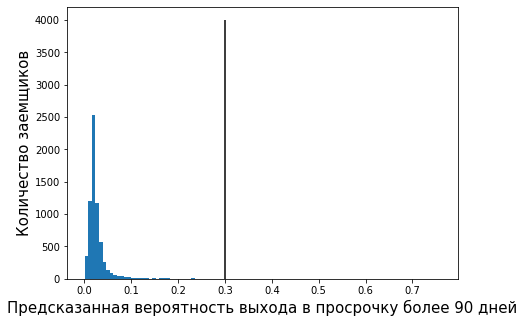

In [ ]:
plt.figure(figsize=(7, 5))

plt.hist(test_probabilities, bins=100)
plt.vlines(0.3, 0, 4000)

plt.xlabel('Предсказанная вероятность выхода в просрочку более 90 дней', fontsize=15)
plt.ylabel('Количество заемщиков', fontsize=15);

Распределение сконцентрировано на отрезке от 0 до 0.3 . Из этого можно предположить, что классификатор склонен классифицировать все объекты скорее как 0, игнорируя метку 1. Это происходит потому, что меток 1 в обучающей выборке сильно меньше, чем меток 0.

#3. Выбор порога классификатора

Порог классификатора контролирует соотношение между количеством False positive и False negative. Если задаем слишком высокий порог классификатора, то чаще предсказываем 0, чем 1, таким образом, увеличивается количество False negative и уменьшается количество False positive. Если же порог низкий - чаще предсказываем 1, чем 0 , таким образом, увеличивается количество False positive и уменьшается False negative.


Посмотрим на то, как влияет порог на матрицу сопряженности:

In [ ]:
higher_thershold = 0.2
alternative_test_predictions = test_probabilities > higher_thershold
alternative_test_predictions

array([False, False, False, ..., False, False, False])

In [ ]:
alternative_confusion_matrix = pd.DataFrame(confusion_matrix(target_values_test, alternative_test_predictions))
alternative_confusion_matrix

,0,1
0,6389,20
1,143,2


Количество False negative срабатываний увеличилось, а количество False positive срабатываний уменьшилось.

#4. ROC кривая классификатора

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
false_positive_rates, true_positive_rates, threshold = roc_curve(target_values_test, test_probabilities)

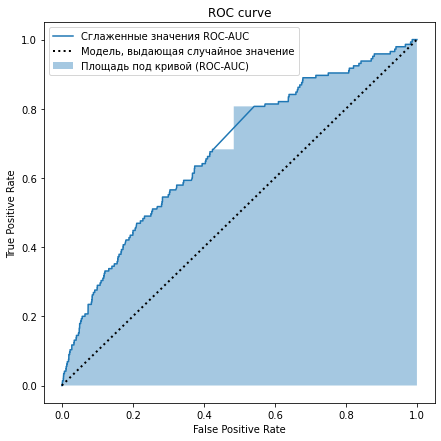

In [ ]:
# создаём график
plt.figure(figsize=(7, 7))

# рисуем кривую
plt.plot(false_positive_rates, true_positive_rates, label='Сглаженные значения ROC-AUC')

# кривая, соответствующая случайному угадыванию
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':', label='Модель, выдающая случайное значение')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.fill_between(false_positive_rates, true_positive_rates, step="mid", alpha=0.4, label='Площадь под кривой (ROC-AUC)')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_value = roc_auc_score(target_values_test, test_probabilities)

print("ROC-AUC на тестовой выборке:", roc_auc_value)

ROC-AUC на тестовой выборке: 0.6779383517790176
